# Litteraturbanken Plats 
version 0.2  

* this [notebook](https://github.com/salgo60/Litteraturbanken_wd_runes/blob/master/notebook/Litteraturbanken%20Plats.ipynb) / github [Litteraturbanken_wd_runes](https://github.com/salgo60/Litteraturbanken_wd_runes)
  * [video](https://youtu.be/mQIFQc_jV1Y) "Wikidata Litteraturbanken platser"
* Task [T273156](https://phabricator.wikimedia.org/T273156) "Litteraturbanken karta"
* [Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank](https://www.wikidata.org/wiki/Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank)
* Wikidata Property 9250 [Litteraturkartan id](https://www.wikidata.org/wiki/Property:P9213)

#### Other sources we sync
* [Arken](https://github.com/salgo60/open-data-examples/blob/master/Arken.ipynb) 
  * WD [Property:P8899](https://www.wikidata.org/wiki/Property:P8899) 
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/litteraturkartan/api/Directus/items/article2?filter[status][eq]=published&limit=10000&fields=*,placeid"
url = "https://red.litteraturbanken.se/api/query/vastsvenska?to=900&search=%7B%22query%22:%7B%22bool%22:%7B%22filter%22:%7B%22term%22:%7B%22status%22:%22published%22%7D%7D,%22must%22:[%7B%22query_string%22:%7B%22query%22:%22av%22,%22fields%22:[%22author%22,%22author.search%22,%22article_author%22,%22article_author.search%22,%22header%5E1.8%22,%22placeaddress%5E1.5%22,%22placename%5E1.5%22,%22free_text%22,%22author.search%22,%22header.search%22,%22placeaddress.search%22,%22placename.search%22,%22free_text.search%22,%22lb_author.full_name%5E10%22,%22lb_author.full_name.search%22],%22default_operator%22:%22and%22,%22type%22:%22cross_fields%22%7D%7D]%7D%7D,%22highlight%22:%7B%22order%22:%22score%22,%22number_of_fragments%22:3,%22boundary_chars%22:%22.,!%3F+%5Ct%5Cn%3C%3E%3B%22,%22fragment_size%22:100,%22fields%22:%7B%22*%22:%7B%7D%7D%7D%7D"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.DataFrame(data["data"])

In [3]:
df.head(10)

,article_author,article_author_prefix,author,authorid,category,created_on,endyear,free_text,header,highlight,id,imgurl,lb,media_file,modified_by,modified_on,owner,placeaddress,placecoord,placeid,placename,popularity,prio,red_additions,sort,source,startyear,status,title,titleurl,wikidata_person_id,lb_author
0,Gunnar D Hansson,None,Karl Arthur Johansson,None,Person,2020-12-10T10:41:36+00:00,1895,I Norum föddes den 8 juli 1895 som Karl Arthur...,Jord-Himla-Stormaren från Norum,{'free_text': ['<em>Av</em> Filosof-Äventyrare...,303,None,False,{'id': 319},{'id': 2},2021-01-13T11:53:15+00:00,{'id': 1},None,"{'lat': 58.054025382165335, 'lon': 11.85034342...",301,Norum,0,NaN,None,None,vastsvenska,1895,published,None,None,None,NaN
1,Paulina Helgeson,None,None,None,Verk,2021-01-14T16:55:35+00:00,1827,Västergötland får ett avsnitt i boken Ett år i...,Spridande av lyxartiklar,{'free_text.search': ['Västergötland får ett <...,477,None,True,{'id': 331},{'id': 2},2021-01-14T17:10:11+00:00,{'id': 4},None,"{'lat': 57.492951685358975, 'lon': 13.08248519...",430,Kinds härad,0,NaN,None,None,vastsvenska,1827,published,None,https://litteraturbanken.se/f%C3%B6rfattare/Fo...,None,NaN
2,Lilian Perme,None,Thorbjörn Hwass,None,Person,2020-12-10T10:41:44+00:00,1927,Thorbjörn Hwass (1852–1927) var prästson född ...,Läkaren som längtade till författarlivet,{'free_text': ['Att Thorbjörn Hwass gärna hade...,341,None,False,{'id': 204},{'id': 2},2021-01-21T10:37:37+00:00,{'id': 1},None,"{'lat': 59.09792892813488, 'lon': 12.646636962...",333,Mo kyrka,0,NaN,"<p>Fotografiet, som är taget av Petrus Johanss...",None,vastsvenska,1852,published,None,None,None,NaN
3,Gunnar D Hansson,None,None,TaubeE,Person,2021-01-18T14:10:33+00:00,1976,Evert Taubes förhållande till Bohuslän behöver...,Älskad visartist,{'free_text': ['Det låg något <em>av</em> verk...,508,None,False,{'id': 339},{'id': 4},2021-01-26T14:08:41+00:00,{'id': 4},None,"{'lat': 57.63400750960539, 'lon': 11.607055664...",259,Vinga,0,10.0,<p>Lyssna till Jila Mossaed som läser Taubes ”...,None,vastsvenska,1890,published,Jag kommer av ett brusand' hav,https://litteraturbanken.se/f%C3%B6rfattare/Ta...,None,"{'authorid': 'TaubeE', 'authorid_norm': 'Taube..."
4,Dick Claésson,None,None,BrattI,Person,2021-01-13T18:50:19+00:00,1946,Iwan Bratt (1881–1946) var stadsläkare i Aling...,En doktorsgård,{'free_text': ['Margit Abenius beskriver dokto...,460,None,True,{'id': 340},{'id': 2},2021-01-26T11:21:55+00:00,{'id': 2},None,"{'lat': 57.929274566834835, 'lon': 12.53492832...",416,"Doktorsgården, Alingsås",0,NaN,"<p>Bilden, som visar efterspelet till när dokt...",None,vastsvenska,1881,published,Nytt land,https://litteraturbanken.se/författare/BrattI/...,None,"{'authorid': 'BrattI', 'authorid_norm': 'Bratt..."
5,Gunnar D Hansson,None,None,TaubeE,Verk,2021-01-19T12:18:13+00:00,1929,I Evert Taubes Fritjof Anderssons visbok från ...,Räddning och katastrof,{'free_text': ['Författaren har själv berättat...,511,None,True,{'id': 339},{'id': 2},2021-01-19T14:27:31+00:00,{'id': 4},None,"{'lat': 58.337162961084836, 'lon': 11.19318008...",371,Utanför Smögen,0,NaN,None,None,vastsvenska,1929,published,Jag kommer av ett brusand' hav,https://litteraturbanken.se/f%C3%B6rfattare/Ta...,None,"{'authorid': 'TaubeE', 'authorid_norm': 'Taube..."
6,Cai Alfredson,None,None,HasselskogN,None,2021-01-19T13:43:17+00:00,1936,NILS HASSELSKOG (1892–1936) var folkskollärare...,Grönköpingsmästaren,{'free_text': ['Det <em>av</em> Hagwald uppfun...,516,None,True,{'id': 198},{'id': 2},2021-01-19T13:45:53+00:00,{'id': 2},,"{'lat': '57.9294', 'lon': '12.5324'}",3,Alingsås,0,NaN,"<p>Läs mer av Nils Hasselskog hos <a href=""htt...",None,vastsvenska,1892,published,Guldregn,https://litteraturbanken.se/författare/Hassels...,None,"{'authorid': 'HasselskogN', 'authorid_norm': '..."
7,Lilian Perme,None,Gunno Dahlstierna,DahlstiernaG,Person,2020-12-10T10:40:38+00:00,1709,"Gunno Eurelius (1661–1709), adlad Dahlstierna,...",Dalslands store son,{'free_text': ['stridsviljan i 

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   article_author         244 non-null    object 
 1   article_author_prefix  13 non-null     object 
 2   author                 126 non-null    object 
 3   authorid               222 non-null    object 
 4   category               315 non-null    object 
 5   created_on             318 non-null    object 
 6   endyear                254 non-null    object 
 7   free_text              318 non-null    object 
 8   header                 318 non-null    object 
 9   highlight              318 non-null    object 
 10  id                     318 non-null    int64  
 11  imgurl                 89 non-null     object 
 12  lb                     318 non-null    bool   
 13  media_file             318 non-null    object 
 14  modified_by            318 non-null    object 
 15  modifi

In [5]:
df.describe() 

,id,placeid,popularity,prio
count,318.000000,318.000000,318.0,21.000000
mean,319.915094,260.977987,0.0,6.523810
std,152.862185,139.151086,0.0,3.265257
min,2.000000,2.000000,0.0,0.000000
25%,214.250000,167.000000,0.0,5.000000
50%,337.500000,290.500000,0.0,7.000000
75%,442.750000,367.750000,0.0,9.000000
max,550.000000,477.000000,0.0,10.000000


In [6]:
df.category.value_counts()

Person         139
Plats           82
Verk            66
Resa            24
Linnés resa      4
Name: category, dtype: int64

In [7]:
df.lb.value_counts()

True     180
False    138
Name: lb, dtype: int64

In [8]:
df.groupby(["lb", "category"]).size()

lb     category   
False  Person         59
       Plats          62
       Verk           15
True   Linnés resa     4
       Person         80
       Plats          20
       Resa           24
       Verk           51
dtype: int64

In [9]:
df.groupby(["lb", "category","wikidata_person_id"]).size()

lb     category  wikidata_person_id
False  Person    Q4952353              2
                 Q5615947              1
       Verk      Q4941859              1
True   Person    Q4990447              1
                 Q5808708              1
dtype: int64

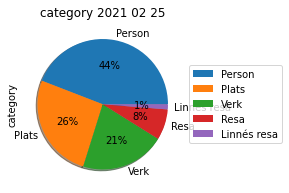

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt   
plotCategory = df.category.value_counts()  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "category " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [11]:
df.article_author.value_counts()[:30]

Erik Andersson      99
Lilian Perme        47
Dick Claésson       34
Gunnar D Hansson    27
Peter Törnqvist     14
Paulina Helgeson     8
Kristian Wedel       5
                     3
Lotta Lotass         3
Cai Alfredson        2
Jonas Ellerström     2
Name: article_author, dtype: int64

In [12]:
df.authorid.value_counts()[:30]

                      33
TörnqvistP            13
TaubeE                12
LagerlöfS              8
HanssonGD              7
WideAG                 6
AnderssonD             6
NordströmL             6
WedelK                 5
WennerbergG            4
LinnéCvon              4
Anonym                 4
RydbergV               4
EdfeltJ                4
ThorildT               3
WollstonecraftM        3
LindqvistE             3
ElkanS                 3
AngeredStrandbergH     3
FlygareCarlénE         2
LidnerB                2
OlssonJO               2
BjurstenH              2
DahlstiernaG           2
HofS                   2
AroseniusI             2
NeanderE               2
CarlbergF              2
BoyeK                  2
ÖdmanJ                 2
Name: authorid, dtype: int64

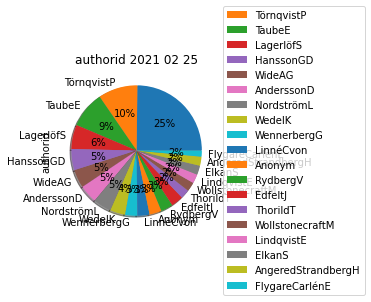

In [13]:
plotCategory = df.authorid.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "authorid " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [14]:
df.article_author.value_counts()

Erik Andersson      99
Lilian Perme        47
Dick Claésson       34
Gunnar D Hansson    27
Peter Törnqvist     14
Paulina Helgeson     8
Kristian Wedel       5
                     3
Lotta Lotass         3
Cai Alfredson        2
Jonas Ellerström     2
Name: article_author, dtype: int64

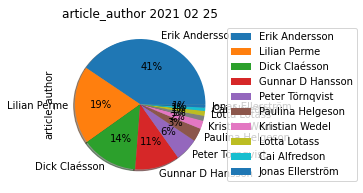

In [15]:
plotCategory = df.article_author.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "article_author " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [16]:
df.wikidata_person_id.value_counts() 

Q4952353    2
Q5615947    1
Q4990447    1
Q5808708    1
Q4941859    1
Name: wikidata_person_id, dtype: int64

In [17]:
df.to_csv(r'Litteraturbanken_Plats.csv')

In [18]:
import pandas_profiling as pp
#eda = pp.ProfileReport(df)
#display(eda)

#### Coordinates missing


In [19]:
url_coord = "https://red.litteraturbanken.se/api/query/vastsvenska?to=900&search=%7B%22query%22:%7B%22bool%22:%7B%22filter%22:%7B%22term%22:%7B%22status%22:%22published%22%7D%7D,%22must%22:[%7B%22query_string%22:%7B%22query%22:%22av%22,%22fields%22:[%22author%22,%22author.search%22,%22article_author%22,%22article_author.search%22,%22header%5E1.8%22,%22placeaddress%5E1.5%22,%22placename%5E1.5%22,%22free_text%22,%22author.search%22,%22header.search%22,%22placeaddress.search%22,%22placename.search%22,%22free_text.search%22,%22lb_author.full_name%5E10%22,%22lb_author.full_name.search%22],%22default_operator%22:%22and%22,%22type%22:%22cross_fields%22%7D%7D]%7D%7D,%22highlight%22:%7B%22order%22:%22score%22,%22number_of_fragments%22:3,%22boundary_chars%22:%22.,!%3F+%5Ct%5Cn%3C%3E%3B%22,%22fragment_size%22:100,%22fields%22:%7B%22*%22:%7B%7D%7D%7D%7D"
url_coord = "https://red.litteraturbanken.se/api/query/vastsvenska?to=900&search=%7B%22query%22:%7B%22bool%22:%7B%22filter%22:%7B%22term%22:%7B%22status%22:%22published%22%7D%7D,%22must%22:[%7B%22query_string%22:%7B%22query%22:%22av%22,%22fields%22:[%22author%22,%22author.search%22,%22article_author%22,%22article_author.search%22,%22header%5E1.8%22,%22placeaddress%5E1.5%22,%22placename%5E1.5%22,%22free_text%22,%22author.search%22,%22header.search%22,%22placeaddress.search%22,%22placename.search%22,%22free_text.search%22,%22lb_author.full_name%5E10%22,%22lb_author.full_name.search%22],%22default_operator%22:%22and%22,%22type%22:%22cross_fields%22%7D%7D]%7D%7D,%22highlight%22:%7B%22order%22:%22score%22,%22number_of_fragments%22:3,%22boundary_chars%22:%22.,!%3F+%5Ct%5Cn%3C%3E%3B%22,%22fragment_size%22:100,%22fields%22:%7B%22*%22:%7B%7D%7D%7D%7D"
                                                        
#r_coord = http.request('GET', url_coord)
#data_coord = json.loads(r_coord.data)
#df_coord = pd.DataFrame(data_coord["data"])
#df_coord.info()

In [20]:
#df_coord.sample(6)

In [21]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ass.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-02-25 01:57:21.934995
Time elapsed (hh:mm:ass.ms) 0:00:04.450922
